In [1]:
from numpy import random
import math
import matplotlib.pyplot as plt

In [2]:
def Newtons_derivative(unknown_function, x, h=1e-7):

    y_xph = unknown_function(x + h)
    y_xmh = unknown_function(x - h)
    dydx = (y_xph - y_xmh) / (2.0 * h)
    
    return dydx

In [3]:
def Newtons_step(unknown_function, x, h=1e-7):
    
    dydx = Newtons_derivative(unknown_function, x, h=h)
    y = unknown_function(x)

    if abs(dydx) > 1e-17:
        x = x - (y / dydx)
    else:
        x = -x

    return x

In [4]:
def HOUND_derivatives(k, f, z0, z1): #, g = 1000
    #accelerated double cumulative smoothing
    e = f - (z0 + z1)
    #z0 = z0 + (e * (4 + 2*g) / (k + 2*g)) + z1
    #z1 = z1 + (e * (6 + 5*g + g**2) / (k + 2*g)**2)
    z0 = z0 + (e * (2004) / (k + 2000)) + z1
    z1 = z1 + (e * (1005006) / (k + 2000)**2)
    
    return z0, z1

In [5]:
def HOUND_step(k, x, y, x_z0, x_z1, y_z0, y_z1): #, g = 1000

    x_z0, x_z1 = HOUND_derivatives(k, x, x_z0, x_z1) #, g=g
    y_z0, y_z1 = HOUND_derivatives(k, y, y_z0, y_z1) #, g=g

    if abs(y_z1) > 1e-17:
        x = x - (y * x_z1 / y_z1)
        #x = (x_z0*y_z1 - y_z0*x_z1)/y_z1 # that formula also works
    else:
        x = -x

    return x, x_z0, x_z1, y_z0, y_z1

In [6]:
def NewtonsHOUND_iteration(unknown_function, xroot, x0, max_iterations = 100, debug=False, h=1e-2, label=''): #, g = 1000
    x_Newton = x0
    y_Newton = unknown_function(x_Newton)

    x_HOUND = x0
    y_HOUND = unknown_function(x_HOUND)
    x_z0 = x_HOUND
    x_z1 = 0
    y_z0 = y_HOUND
    y_z1 = 0

    iteration = 0

    if debug: print(f"Newton's Iteration {iteration}: x = {x_Newton:.8f}, y(x) = {y_Newton:.8f}\tHOUND Iteration {iteration}: x = {x_HOUND:.8f}, y(x) = {y_HOUND:.8f}")

    iterations = [0]
    errors_Newton = [abs(x_Newton - xroot)]
    errors_HOUND = [abs(x_HOUND - xroot)]

    while iteration < max_iterations:
        iteration += 1

        x_Newton = Newtons_step(unknown_function, x_Newton, h=h)
        x_HOUND, x_z0, x_z1, y_z0, y_z1 = HOUND_step(iteration, x_HOUND, y_HOUND, x_z0, x_z1, y_z0, y_z1) #, g=g

        iterations.append(iteration)
        errors_Newton.append(abs(x_Newton - xroot))
        errors_HOUND.append(abs(x_HOUND - xroot))

        y_Newton = unknown_function(x_Newton)
        y_HOUND = unknown_function(x_HOUND)

        if debug: print(f"Newton's Iteration {iteration}: x = {x_Newton:.8f}, y(x) = {y_Newton:.8f}\tHOUND Iteration {iteration}: x = {x_HOUND:.8f}, y(x) = {y_HOUND:.8f}")

    fig, ax = plt.subplots()
    plt.title(label)
    #ax.set_ylim(1e-3, 1e2)
    ax.plot(iterations, errors_Newton, label='Newton\'s')
    ax.plot(iterations, errors_HOUND, label='HOUND')
    ax.set_xlabel("k")
    ax.set_ylabel("absolute value of error")
    ax.set_yscale('log')
    ax.grid();
    plt.legend()
    plt.show();

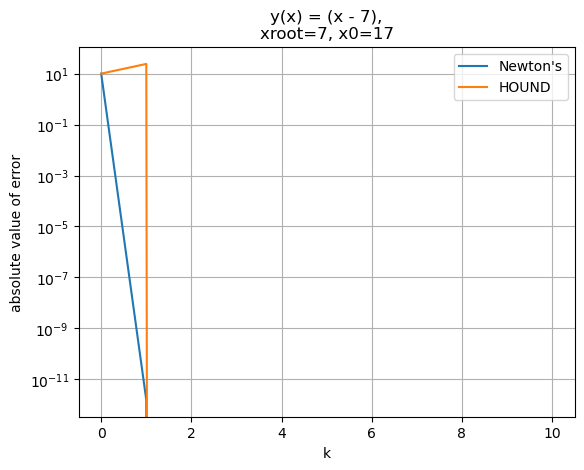

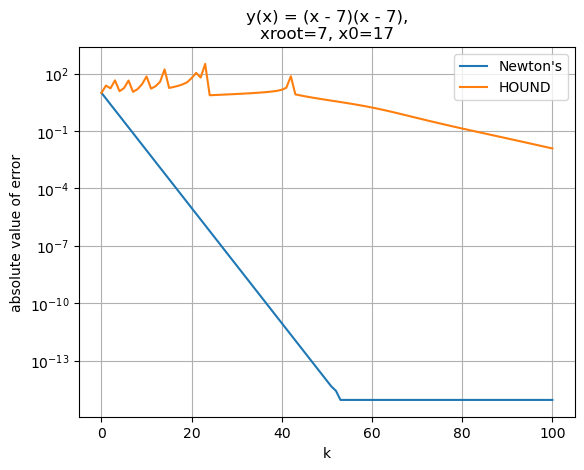

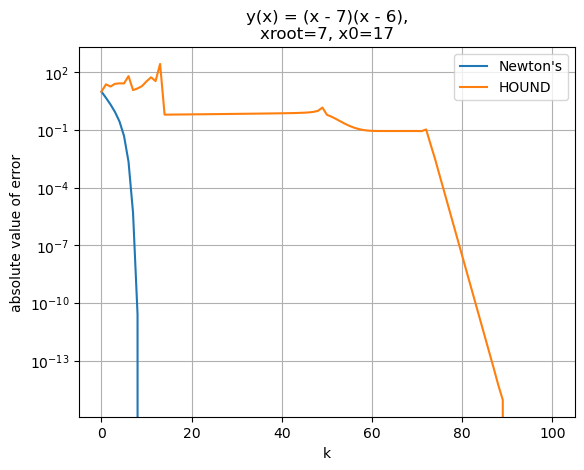

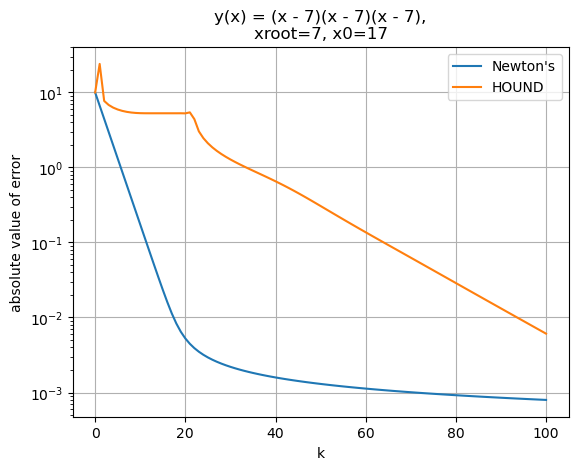

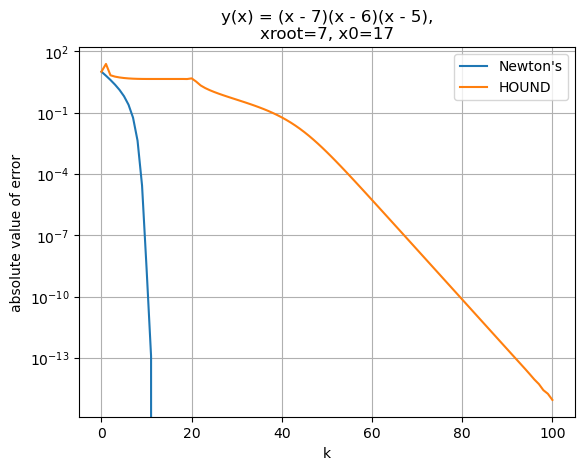

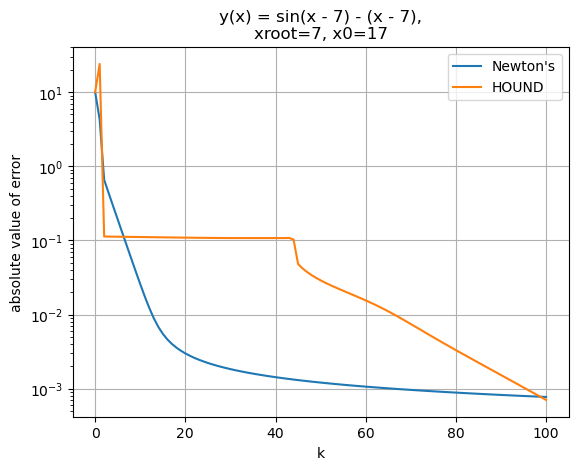

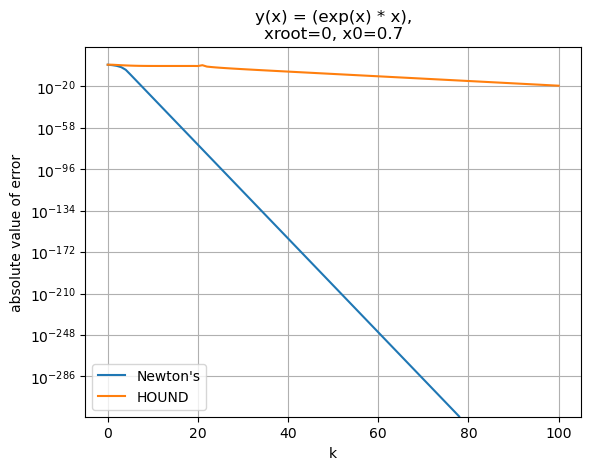

In [7]:
NewtonsHOUND_iteration(lambda x: (x - 7), label='y(x) = (x - 7),\nxroot=7, x0=17', xroot=7.0, x0=17.0, max_iterations = 10)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 7), label='y(x) = (x - 7)(x - 7),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 6), label='y(x) = (x - 7)(x - 6),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 7)*(x - 7), label='y(x) = (x - 7)(x - 7)(x - 7),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 6)*(x - 5), label='y(x) = (x - 7)(x - 6)(x - 5),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (math.sin(x - 7) - (x - 7)), label='y(x) = sin(x - 7) - (x - 7),\nxroot=7, x0=17', xroot=7, x0=17)
NewtonsHOUND_iteration(lambda x: (math.exp(x) * x), label='y(x) = (exp(x) * x),\nxroot=0, x0=0.7', xroot=0, x0=0.7)

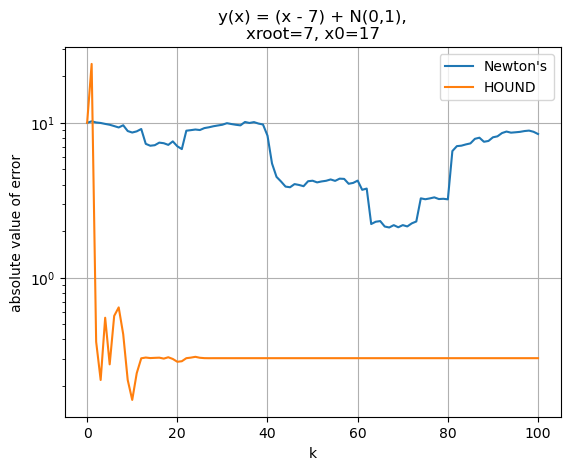

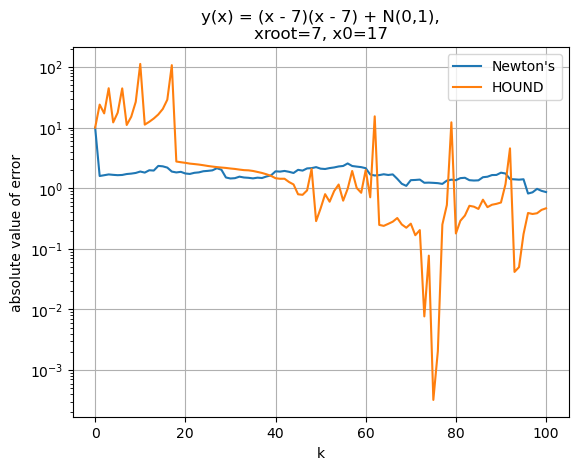

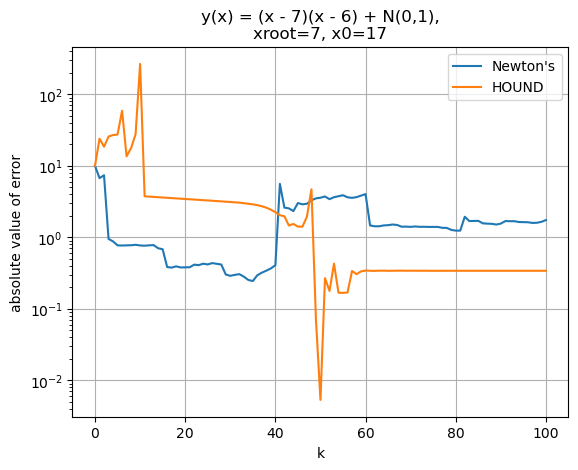

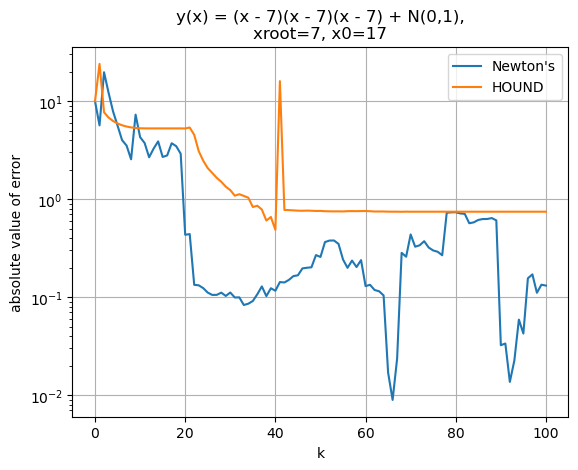

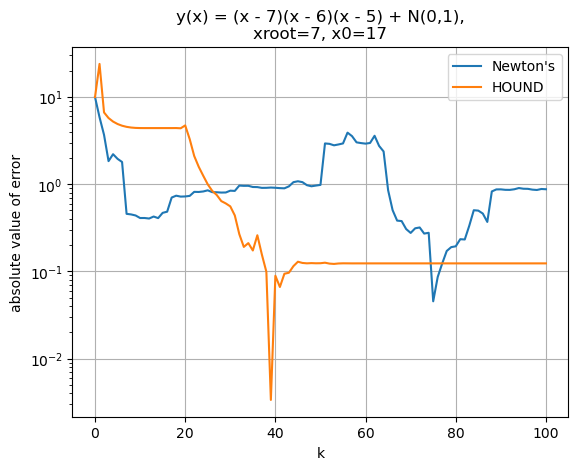

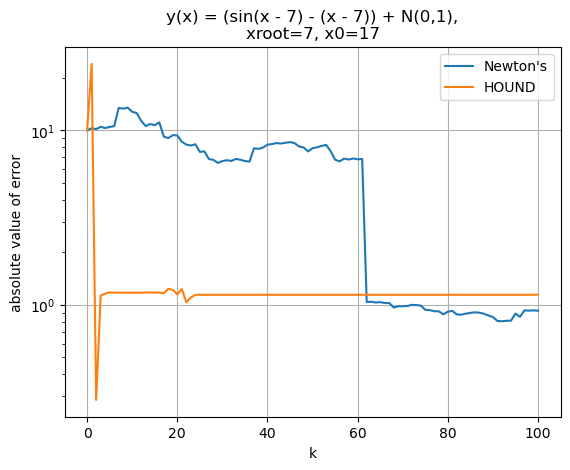

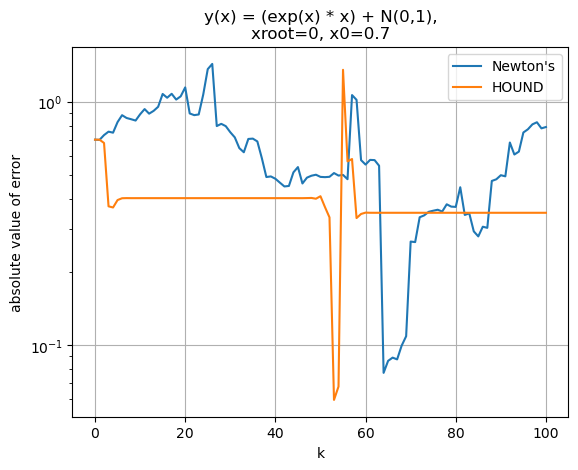

In [24]:
random.seed(42)
NewtonsHOUND_iteration(lambda x: (x - 7) + random.normal(0, 1), label='y(x) = (x - 7) + N(0,1),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 7) + random.normal(0, 1), label='y(x) = (x - 7)(x - 7) + N(0,1),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 6) + random.normal(0, 1), label='y(x) = (x - 7)(x - 6) + N(0,1),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 7)*(x - 7) + random.normal(0, 1), label='y(x) = (x - 7)(x - 7)(x - 7) + N(0,1),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (x - 7)*(x - 6)*(x - 5) + random.normal(0, 1), label='y(x) = (x - 7)(x - 6)(x - 5) + N(0,1),\nxroot=7, x0=17', xroot=7.0, x0=17.0)
NewtonsHOUND_iteration(lambda x: (math.sin(x - 7) - (x - 7)) + random.normal(0, 1), label='y(x) = (sin(x - 7) - (x - 7)) + N(0,1),\nxroot=7, x0=17', xroot=7, x0=17)
NewtonsHOUND_iteration(lambda x: (math.exp(x) * x) + random.normal(0, 1), label='y(x) = (exp(x) * x) + N(0,1),\nxroot=0, x0=0.7', xroot=0.0, x0=0.7)